# STAT 345 Prelim Exam Two -- Practice Exam Solutions

You have 48 hours to do this exam, but it should only take $\lesssim$2 hours. You may use any books or notes you like, and any electronic devices with communication capabilities
switched off (airplane mode).  You should not communicate with anyone or look anything up on the internet from the time you start the exam to the time you submit it.

Some problems contain boxes ($\boxed{\color{brown}{????}}$) into which you should place your final
answer. Express all numerical results to at least three decimal places.

The exam contains three problems worth a total of 46 points. Try not to
spend too much time on any one problem. The weight of each part of each
problem is listed, as is the total weight for each problem. Later parts
of a problem may or may not depend on some, but not all, of the previous
parts.

**Show your work!**

Fill in your solutions in the notebook below, inserting markdown and/or code cells as needed.  Try to do reasonably well with the typesetting, but don't feel compelled to replicate my formatting exactly.  **You do NOT need to make random variables blue!**

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

# 1. Testing for Differences in Variance (19 points total)

**(a)** \[5pts\]
Suppose we have independent data samples

In [3]:
a_i = np.array([10.699, 16.362, 10.343, 13.743, 13.646, 19.019, 13.937, 17.109, 12.232, 28.247,
                16.001, 15.377, 15.372, 23.026, 13.903])
b_j = np.array([0.938, 22.841, 28.907, 18.263, 15.732, 18.828, 18.757, 22.844, 79.969, 13.410])

and we wish to perform a rank-based test to see whether they come from distributions with different variances.  Define, construct, and evaluate the relevant statistic.

<font color="brown">To test for differences in variance, we need to use the Conover squared-ranks test.  The statistic is the sum of the squares of the ranks of the differences $U_i=\lvert a_i-\overline{a}\rvert$ in the combined list of $U_i$ and $V_j=\lvert b_j-\overline{b}\rvert$.</font>

$$\hbox{Definition of statistic:} \boxed{\color{brown}{\sum_{i=1}^n [R(\lvert a_i-\overline{a}\rvert)]^2}}$$

<font color="brown">We compute the two sample means:</font>

In [4]:
abar=np.mean(a_i)
bbar=np.mean(b_j)
abar, bbar

(15.9344, 24.0489)

<font color="brown">And then $U_i=\lvert a_i-\overline{a}\rvert$ and $V_j=\lvert b_j-\overline{b}\rvert$</font>

In [5]:
U_i = np.abs(a_i-abar)
V_j = np.abs(b_j-bbar)
U_i, V_j

(array([ 5.2354,  0.4276,  5.5914,  2.1914,  2.2884,  3.0846,  1.9974,
         1.1746,  3.7024, 12.3126,  0.0666,  0.5574,  0.5624,  7.0916,
         2.0314]),
 array([23.1109,  1.2079,  4.8581,  5.7859,  8.3169,  5.2209,  5.2919,
         1.2049, 55.9201, 10.6389]))

In [6]:
R_r = stats.rankdata(np.concatenate((U_i,V_j))); R_r

array([16.,  2., 18., 10., 11., 12.,  8.,  5., 13., 23.,  1.,  3.,  4.,
       20.,  9., 24.,  7., 14., 19., 21., 15., 17.,  6., 25., 22.])

In [7]:
n = len(a_i)
m = len(b_j)
N = n+m
n, m, N

(15, 10, 25)

<font color="brown">The first $n=15$ ranks are the ranks of the $\{U_i\}$:</font>

In [8]:
RU_i = R_r[:n]; RU_i

array([16.,  2., 18., 10., 11., 12.,  8.,  5., 13., 23.,  1.,  3.,  4.,
       20.,  9.])

In [9]:
TU = np.sum(RU_i**2); TU

2243.0

$$\hbox{Statistic Value:} \boxed{\color{brown}{2243}}$$

**(b)** \[3pts\]
Calculate the $p$-value, according to this test, associated with the observed data.  Be sure to  specify any approximation used in this calculation.

<font color="brown">We'll use the normal approximation to get the $p$-value.  The expectation value of $T_u$ is $n\overline{R^2}$, where we can calculate $\overline{R^2}$ directly from the ranks</font>

In [10]:
Rsq_r = R_r**2
Rsqbar = np.mean(Rsq_r); Rsqbar

221.0

<font color="brown">or, since there are no ties, by the formula</font>

In [11]:
(N+1)*(2*N+1)/6.

221.0

<font color="brown">The variance of $T_u$ is $\frac{nm}{N-1}\overline{R^2-\overline{R^2}}$</font>

In [12]:
varT = n*m/(N-1) * np.mean((Rsq_r-Rsqbar)**2); varT

233155.00000000003

<font color="brown">So $T_1$, which is standard normal under the null hypothesis, is</font>

In [13]:
T1 = (TU-n*Rsqbar)/np.sqrt(varT); T1

-2.2200993961374373

<font color="brown">This makes the two-sided $p$-value, according to the normal approximation:</font>

In [14]:
2*stats.norm.cdf(T1)

0.02641202119735728

$$\hbox{$p$-value} = \boxed{\color{brown}{0.026}}$$

**(c)** \[5pts\]
Now suppose we have four data samples: the two given before, as well as

In [15]:
c_l = np.array([13.617, 10.000, 15.624, 11.550, 19.785, 9.543, 16.228, 1.407])
d_m = np.array([14.924, 20.824, 16.733, 18.559, 13.861, 6.985, 14.442, 17.349, 9.313, 22.626, 5.334])

and we wish to perform a rank-based test to see whether there's evidence that *any* of the distributions from which they're drawn have different variances.  Define, construct, and evaluate the relevant statistic.

<font color="brown">We still have the Conover squared-ranks test, but now we use the multiple-sample version, analogous to the Kruskal-Wallis test.</font>

<font color="brown">We still have the Conover squared-ranks test, but now we use the multiple-sample version, analogous to the Kruskal-Wallis test.</font>

$$\hbox{Definition of statistic:} \boxed{\color{brown}{\frac{\sum_{i=1}^k \frac{1}{n_i}\bigl(S_i - n_i\overline{R^2}\bigr)^2}
  {
    \frac{N}{N-1}
    \overline{\bigl(R^2-\overline{R^2}\bigr)^2}
  }
  \hbox{ where } S_i = \sum_{j=1}^{n_j} R(\lvert x_{ij}-\overline{x}_i\rvert)}}$$

<font color="brown">We have to modify the notation a bit for the $k$-sample test.  We define $x_{ij}$ by $x_{1j}=a_j$, $x_{2j}=b_j$, $x_{3j}=c_j$, and $x_{4j}=d_j$.  We combine the four arrays into a list of arrays:</font>

In [16]:
x_i_j = [a_i,b_j,c_l,d_m]
x_i_j

[array([10.699, 16.362, 10.343, 13.743, 13.646, 19.019, 13.937, 17.109,
        12.232, 28.247, 16.001, 15.377, 15.372, 23.026, 13.903]),
 array([ 0.938, 22.841, 28.907, 18.263, 15.732, 18.828, 18.757, 22.844,
        79.969, 13.41 ]),
 array([13.617, 10.   , 15.624, 11.55 , 19.785,  9.543, 16.228,  1.407]),
 array([14.924, 20.824, 16.733, 18.559, 13.861,  6.985, 14.442, 17.349,
         9.313, 22.626,  5.334])]

<font color="brown">The sizes $\{n_i\}$ of the samples, number of samples $k$, and total number of data points $N=\sum_{i=1}^k n_i$ are:</font>

In [17]:
n_i = np.array([len(xi_j) for xi_j in x_i_j]); k = len(n_i); N = np.sum(n_i); n_i,k,N

(array([15, 10,  8, 11]), 4, 44)

<font color="brown">The means $\overline{x}_i=\frac{1}{n_i}\sum_{j=1}^{n_i} x_{ij}$ are</font>

In [18]:
xbar_i = np.array([np.mean(xi_j) for xi_j in x_i_j]); xbar_i

array([15.9344    , 24.0489    , 12.21925   , 14.63181818])

<font color="brown">We can check that $\overline{x}_1=\overline{a}$, $\overline{x}_2=\overline{b}$, etc:</font>

In [19]:
abar, bbar, np.mean(c_l), np.mean(d_m)

(15.9344, 24.0489, 12.219249999999999, 14.631818181818183)

<font color="brown">Now we find the quantities to rank, namely $U_ij=\lvert x_{ij}-\overline{x}_i\rvert$:</font>

In [20]:
U_i_j = [np.abs(xi_j-np.mean(xi_j)) for xi_j in x_i_j]; U_i_j

[array([ 5.2354,  0.4276,  5.5914,  2.1914,  2.2884,  3.0846,  1.9974,
         1.1746,  3.7024, 12.3126,  0.0666,  0.5574,  0.5624,  7.0916,
         2.0314]),
 array([23.1109,  1.2079,  4.8581,  5.7859,  8.3169,  5.2209,  5.2919,
         1.2049, 55.9201, 10.6389]),
 array([ 1.39775,  2.21925,  3.40475,  0.66925,  7.56575,  2.67625,
         4.00875, 10.81225]),
 array([0.29218182, 6.19218182, 2.10118182, 3.92718182, 0.77081818,
        7.64681818, 0.18981818, 2.71718182, 5.31881818, 7.99418182,
        9.29781818])]

<font color="brown">We can check that the first two arrays in the list match the $U_i$ and $V_j$ from part (a):</font>

In [21]:
U_i, V_j

(array([ 5.2354,  0.4276,  5.5914,  2.1914,  2.2884,  3.0846,  1.9974,
         1.1746,  3.7024, 12.3126,  0.0666,  0.5574,  0.5624,  7.0916,
         2.0314]),
 array([23.1109,  1.2079,  4.8581,  5.7859,  8.3169,  5.2209,  5.2919,
         1.2049, 55.9201, 10.6389]))

<font color="brown">Now we rank them in the usual way to get $R_{ij}$:</font>

In [22]:
U_r = np.concatenate(U_i_j); RU_r = stats.rankdata(U_r)
i_r = np.concatenate([(i,)*n_i[i] for i in range(k)])
RU_i_j = [RU_r[i_r==i] for i in range(k)]; RU_i_j

[array([28.,  4., 31., 16., 18., 21., 13.,  9., 23., 42.,  1.,  5.,  6.,
        34., 14.]),
 array([43., 11., 26., 32., 38., 27., 29., 10., 44., 40.]),
 array([12., 17., 22.,  7., 35., 19., 25., 41.]),
 array([ 3., 33., 15., 24.,  8., 36.,  2., 20., 30., 37., 39.])]

In [23]:
S_i = np.array([np.sum(RUi_j**2) for RUi_j in RU_i_j]); S_i

array([ 6739., 10320.,  4858.,  7453.])

In [24]:
Sbar = np.mean(RU_r**2); Sbar

667.5

In [25]:
np.sum(S_i**2/n_i)-N*Sbar**2, np.sum((S_i-n_i*Sbar)**2/n_i)

(2073139.8393939398, 2073139.8393939394)

In [26]:
Dsq=N/(N-1)*np.mean((RU_r**2-Sbar)**2); Dsq, N/(N-1)*(np.mean(RU_r**4)-Sbar**2),(np.sum(RU_r**4)-N*Sbar**2)/(N-1) 

(355377.0, 355377.0, 355377.0)

In [27]:
T = np.sum((S_i-n_i*Sbar)**2/n_i)/Dsq; T

5.8336353770613725

$$\hbox{Statistic Value:} \boxed{\color{brown}{5.83}}$$

**(d)** \[3pts\]
Calculate the $p$-value, according to this test, associated with the observed data.  Be sure to  specify any approximation used in this calculation.

<font color="brown">We get the $p$-value by taking the tail probability of the null distribution, a chi-squared with $k-1=3$ degrees of freedom:</font>

In [28]:
stats.chi2(df=k-1).sf(T)

0.11999079989007663

$$\hbox{$p$-value} = \boxed{\color{brown}{0.120}}$$

**(e)** \[3pts\]
Explain the reason for the discrepancy between the $p$ values (and implied statistical conclusions) in parts (b) and (d).

<font color="brown">The two-sample squared ranks test showed significant evidence ($p\lesssim 0.025$) for a difference in the variance of the distributions from which `a_i` and `b_j` were drawn.  However, the four-sample squared ranks test did not find significant evidence ($p\gtrsim 0.10$) for a difference among the variances for `a_i`, `b_j`, `c_l` and `d_m`.  This is a manifestation (qualitatively at least) of what's known as a "trials factor".  If the difference between `a_i` and `b_j` is all you're looking for, it looks significant, but if it's just one of several ways the set of four data sets could differ, it doesn't cross the threshold.</font>

## 2. Monte Carlo Estimates for the Friedman Test (13 points total)

Consider a balanced block design in which $k=3$ treatments are applied to each of $b=5$ blocks.  The following Monte Carlo generates $10^4$ realizations of such a data set under a realization of the null hypothesis of no difference in the average response to the three treatments.

In [29]:
np.random.seed(20240408)
Nmonte = 10**4
mu_i = np.array([40.55, 46.82, 61.50, 48.12, 56.06])
b = len(mu_i)
k = 3
X0_Iij = mu_i[None,:,None] + stats.logistic.rvs(size=(Nmonte,b,k))

The following code constructs the Friedman test statistic (referred to in Conover as $T_1$)
$$
Q = \frac{12}{bk(k+1)} \sum_{j=1}^k \left(R_j - \frac{b(k+1)}{2}\right)^2
$$
for each of the $10^4$ Monte Carlo trials.

In [30]:
R0_Iij = stats.mstats.rankdata(X0_Iij,axis=-1)
R0_Ij = np.sum(R0_Iij,axis=1)
Q0_I = (12/(b*k*(k+1))) * np.sum((R0_Ij-0.5*b*(k+1))**2,axis=-1)

**(a)** \[3pts\]
List all of the possible values of $Q$ (you may assume that the Monte Carlo produces every possible value).

In [31]:
Q_q = np.unique(Q0_I); Q_q

array([ 0. ,  0.4,  1.2,  1.6,  2.8,  3.6,  4.8,  5.2,  6.4,  7.6,  8.4,
       10. ])

$$\hbox{List of $Q$ values:} \boxed{\color{brown}{0. ,  0.4,  1.2,  1.6,  2.8,  3.6,  4.8,  5.2,  6.4,  7.6,  8.4, 10.}}$$

**(b)** \[6pts\]
For each $Q$ value, use the Monte Carlo to estimate the $p$-value that should be associated with an observed Friedman test statistic of that value.  Plot this along with the approximate $p$-value according to Friedman's original $\chi^2$ assumption, as well as the improved $F$-distribution approximation.

In [32]:
pval_q = np.mean(Q0_I[None,:]>=Q_q[:,None],axis=-1); pval_q

array([1.000e+00, 9.507e-01, 6.904e-01, 5.199e-01, 3.648e-01, 1.813e-01,
       1.229e-01, 9.470e-02, 3.610e-02, 2.200e-02, 9.500e-03, 8.000e-04])

<font color="brown">The original approximation was that $Q$ is $\chi^2(k-1)$ distributed.</font>

In [33]:
pvalchisq_q = stats.chi2(df=k-1).sf(Q_q); pvalchisq_q

array([1.        , 0.81873075, 0.54881164, 0.44932896, 0.24659696,
       0.16529889, 0.09071795, 0.07427358, 0.0407622 , 0.02237077,
       0.01499558, 0.00673795])

<font color="brown">The improved approximation is that
$$
\frac{(b-1)Q}{b(k-1)-Q}$$ is $F(k-1,(b-1)(k-1))$ distributed.</font>

In [34]:
pvalF_q = stats.f(k-1,(b-1)*(k-1)).sf((b-1)*Q_q/(b*(k-1)-Q_q)); pvalF_q

/tmp/ipykernel_39186/1863294365.py:1: RuntimeWarning: divide by zero encountered in divide
  pvalF_q = stats.f(k-1,(b-1)*(k-1)).sf((b-1)*Q_q/(b*(k-1)-Q_q)); pvalF_q


array([1.0000000e+00, 8.4934656e-01, 5.9969536e-01, 4.9787136e-01,
       2.6873856e-01, 1.6777216e-01, 7.3116160e-02, 5.3084160e-02,
       1.6796160e-02, 3.3177600e-03, 6.5536000e-04, 0.0000000e+00])

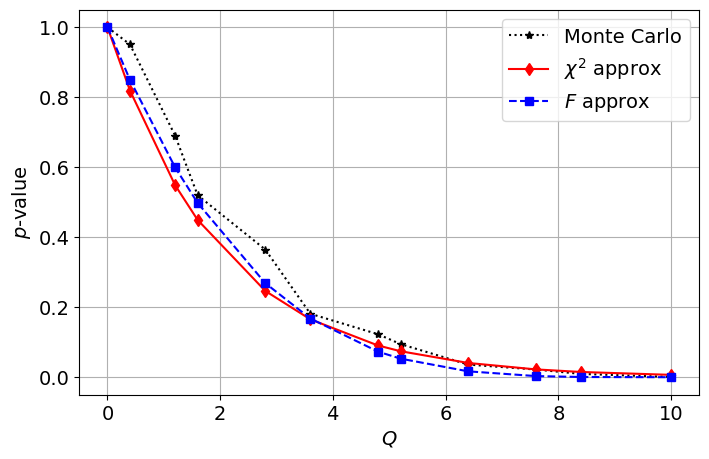

In [35]:
plt.plot(Q_q,pval_q,'k:*',label='Monte Carlo');
plt.plot(Q_q,pvalchisq_q,'r-d',label=r'$\chi^2$ approx');
plt.plot(Q_q,pvalF_q,'b--s',label=r'$F$ approx');
plt.xlabel(r'$Q$');
plt.ylabel('$p$-value');
plt.grid();
plt.legend();

<font color="brown">Note that you addressed this comparison in a different way on a problem set.  Among other differences, it used the exact probability distribution based on combinations of ranks rather than a rando Monte Carlo.  We use a Monte Carlo here since we also want to estimate the power in part (c), for which no combinatorical argument will work.</font>

<font color="brown">BTW, it seems like both approximations underestimate the $p$-value.  The biggest reason for this is actually that there's no continuity correction applied, and we're comparing them to $P(Q\mathbin{\ge} q)$ rather than $P(Q\mathbin{>}q)$.  It's difficult to define a continuity correction given the uneven spacing of possible $Q$ values, but we can consider $P(Q\mathbin{>}q)$ to $P(Q\mathbin{\ge}q)$ to form an envelope in which the continuous values ought to lie.</font>

In [36]:
pvallow_q = np.mean(Q0_I[None,:]>Q_q[:,None],axis=-1)

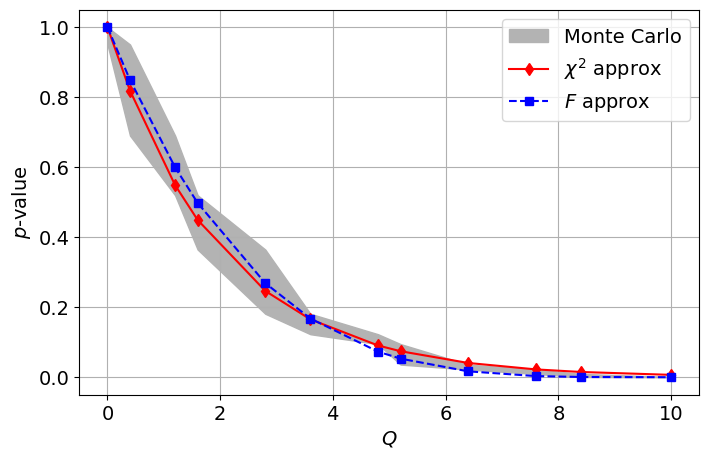

In [37]:
plt.fill_between(Q_q,pvallow_q,pval_q,color=[0.7,0.7,0.7],label='Monte Carlo');
plt.plot(Q_q,pvalchisq_q,'r-d',label=r'$\chi^2$ approx');
plt.plot(Q_q,pvalF_q,'b--s',label=r'$F$ approx');
plt.xlabel(r'$Q$');
plt.ylabel('$p$-value');
plt.grid();
plt.legend();

**(c)** \[4pts\]
The following Monte Carlo generates $10^4$ realizations of the Friedman test statistic $Q$ under a realization of the alternative hypothesis that the three treatments have different average responses.

In [38]:
mu1_j = np.array([1.39, -0.05, -0.22])
X1_Iij = mu1_j[None,None,:] + X0_Iij
R1_Iij = stats.mstats.rankdata(X1_Iij,axis=-1)
R1_Ij = np.sum(R1_Iij,axis=1)
Q1_I = (12/(b*k*(k+1))) * np.sum((R1_Ij-0.5*b*(k+1))**2,axis=-1)

Use the ensembles `Q0_I` and `Q1_I` to estimate the significance $\alpha$ and power $\gamma$ of a series of tests with all possible thresholds on the Friedman test statistic $Q$, and plot the resulting ROC curve.  Include all the appropriate features of such a plot, in particular the aspect ratio and an $\alpha=\gamma$ reference line.

<font color="brown">We have to be a little careful about whether we define the thresholds as rejecting $H_0$ when $Q>c_q$ or $Q\ge c_q$.  We've already calculate the $p$-values, which are $P(Q\mathbin{\ge}q)$ but for a testing threshold, we prefer to define $\alpha=P(Q\mathbin{>}c_q|H_0)$ and $\gamma=P(Q\mathbin{>}c_q|H_1)$.  But then to get the point $(\alpha,\gamma)=(1,1)$, we should also include a test which always rejects $H_0$, i.e., add one $c_q$ which is below all of the possible values:</font>

In [39]:
cq_Q = np.concatenate(([-1.],Q_q)); cq_Q

array([-1. ,  0. ,  0.4,  1.2,  1.6,  2.8,  3.6,  4.8,  5.2,  6.4,  7.6,
        8.4, 10. ])

In [40]:
alpha_Q = np.mean(Q0_I[None,:]>cq_Q[:,None],axis=-1); alpha_Q

array([1.000e+00, 9.507e-01, 6.904e-01, 5.199e-01, 3.648e-01, 1.813e-01,
       1.229e-01, 9.470e-02, 3.610e-02, 2.200e-02, 9.500e-03, 8.000e-04,
       0.000e+00])

In [41]:
gamma_Q = np.mean(Q1_I[None,:]>cq_Q[:,None],axis=-1); gamma_Q

array([1.    , 0.9821, 0.8631, 0.7513, 0.6394, 0.4278, 0.3391, 0.2738,
       0.1539, 0.1049, 0.0427, 0.0038, 0.    ])

<font color="brown">We plot $\gamma(c_q)$ vs $\alpha(c_q)$, making sure the scale of the axes is the same and including a $45^\circ$ line for comparison.</font>

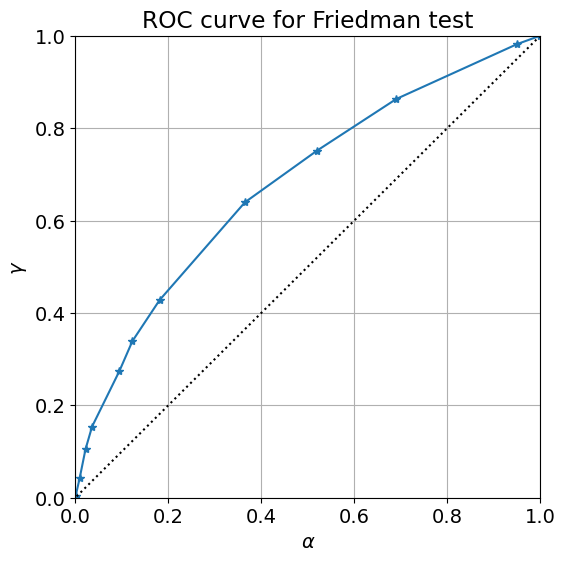

In [42]:
plt.figure(figsize=(6,6));
plt.plot(alpha_Q,gamma_Q,'-*');
plt.plot(alpha_Q,alpha_Q,'k:');
plt.xlabel(r'$\alpha$');
plt.ylabel(r'$\gamma$');
plt.title('ROC curve for Friedman test');
plt.xlim(0,1);
plt.ylim(0,1);
plt.grid();

## 3. Goodness of Fit Test (14 points total)

A device is redundantly constructed with two critical components, and will continue to function until both components fail.  If each component's failure is governed by a Poisson process with rate $1/\beta$, the functional lifetime $\color{royalblue}{X}$ will be an Erlang random variable, i.e., a Gamma random variable with shape parameter $\alpha=2$ and scale parameter $\beta$.  (The fact that $\alpha$ is an integer is what makes this Gamma distribution an Erlang distribution.)  Its pdf will be
$$
f(x;\beta) =
\begin{cases}
0 & -\infty<x<0 \\
\frac{1}{\beta^2} x\,e^{-x/\beta} & 0<x<\infty
\end{cases}
$$
and its cdf will be
$$
F(x;\beta) =
\begin{cases}
0 & -\infty<x<0 \\
1 - \left(1+\frac{x}{\beta}\right) e^{-x/\beta} & 0<x<\infty
\end{cases}
$$
Suppose we collect the functional lifetimes, in days, of ten components, and find the following:

In [43]:
x_i = np.array([43.66, 72.03, 13.83, 18.66, 4.18, 11.65, 41.18, 56.60, 55.98, 58.38])

**(a)** \[4pts\]
We wish to evaluate the hypothesis that the device's lifetime is described by the model above, with a single component failure rate $1/\beta$ of one per ten days, using the Kolmogorov test.  Evaluate each of the following at the ten order statistics $\{x^{(i)}\}$ of the data above (each of your answers should be a list of ten numbers):

- The hypothesized CDF $F^*(x^{(i)})$ according to the model.

<font color="brown">The ten order statistics are as follows:</font>

In [44]:
xordered_i = np.sort(x_i); xordered_i

array([ 4.18, 11.65, 13.83, 18.66, 41.18, 43.66, 55.98, 56.6 , 58.38,
       72.03])

<font color="brown">If the rate $1/\beta$ is one per ten days, than $\beta=10\,\text{days}$, and we can either use the Gamma cdf from `scipy.stats` to evaluate $F^*(x^{(i)})$:</font>

In [45]:
beta = 10 # days
Fstar_i = stats.gamma(2,scale=beta).cdf(xordered_i)
Fstar_i

array([0.06644236, 0.32468744, 0.40228415, 0.55651117, 0.91669413,
       0.93184135, 0.97555265, 0.97680644, 0.98006951, 0.9938941 ])

<font color="brown">or compute it directly from the formula:</font>

In [46]:
1 - (1+xordered_i/beta) * np.exp(-xordered_i/beta)

array([0.06644236, 0.32468744, 0.40228415, 0.55651117, 0.91669413,
       0.93184135, 0.97555265, 0.97680644, 0.98006951, 0.9938941 ])

- The empirical CDF $\hat{F}(x^{(i)};\mathbf{x})$ associated with the observed data $\mathbf{x}\equiv\{x_i\}$

<font color="brown">Since the empirical cdf $\hat{F}(x;\mathbf{x})=\frac{\#[x_i\le x]}{n}$ where $\#[x_i\le x]$ is the number of points in the sample at or below $x$, which by definition is $i$ when $x=x^{(i)}$ (the $i$th order statistic), we have $\hat{F}(x^{(i)};\mathbf{x})=i/n$:</font>

In [47]:
n = len(x_i)
Fhatm_i = np.arange(1,n+1)/n
Fhatm_i

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

- The empirical CDF $\hat{F}(x^{(i)}-\epsilon;\mathbf{x})$, evaluated at an argument infinitesimally less than the order statistic $x^{(i)}$.

<font color="brown">At $x$ infinitestimally below $x^{(i)}$, the number of points below $x$ is $i-1$, so $\hat{F}(x^{(i)};\mathbf{x})=(i-1)/n$:</font>

In [48]:
Fhatp_i = np.arange(n)/n
Fhatp_i

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

**(b)** \[4pts\]
Use the results of part (a) to compute the two-sided Kolmogorov statistic $T$, and the associated $p$-value for the test of this model.  (Do not just use a function like `stats.kstest` or `stats.ks_1samp` to perform the test, although you may use it to check your answer.)

<font color="brown">The one-sided Kolmogorov statistics are $T^{+}=\operatorname{sup}_x\left(F^*(x)-\hat{F}(x;\mathbf{x})\right)=\operatorname{max}_i\left(F^*(x^{(i)})-\hat{F}(x^{(i)}-\epsilon;\mathbf{x})\right)$</font>

In [49]:
Tp = max(Fstar_i - Fhatp_i); Tp

0.516694129846515

<font color="brown">and $T^{-}=\operatorname{sup}_x\left(\hat{F}(x;\mathbf{x})-F^*(x)\right)=\operatorname{max}_i\left(\hat{F}(x^{(i)};\mathbf{x})-F^*(x^{(i)})\right) $</font>

In [50]:
Tm = max(Fhatm_i - Fstar_i); Tm

0.03355763990640495

<font color="brown">So the two-sided statistic is the higher of these:</font>

$$T = \boxed{\color{brown}{0.517}}$$

<font color="brown">We can get the two-sied $p$-value from the Kolmogorov distribution:</font>

In [51]:
2*stats.ksone(n).sf(max(Tp,Tm))

0.005250654212466165

$$\hbox{$p$-value} = \boxed{\color{brown}{0.005}}$$

<font color="brown">We can check that the statistic and $p$-value agree with SciPy's KS test routine:</font>

In [52]:
stats.ks_1samp(x_i,cdf=stats.gamma(2,scale=beta).cdf)

KstestResult(statistic=0.516694129846515, pvalue=0.005250654212466165, statistic_location=41.18, statistic_sign=-1)

In [53]:
stats.kstest(x_i,cdf=stats.gamma(2,scale=beta).cdf)

KstestResult(statistic=0.516694129846515, pvalue=0.005250654212466165, statistic_location=41.18, statistic_sign=-1)

**(c)** \[3pts\]
Now suppose we wish to test the hypothesis that the lifetime is described by the two-component Poisson model, but with an unknown failure rate.  Since the $\text{Gamma}(2,\beta)$ distribution has a mean of $2\beta$, a good estimate for the unknown scale parameter $\beta$ is $\hat\beta(\mathbf{x})=\overline{x}/2$, where $\overline{x}$ is the sample mean. Using the same data set as in part (a), evaluate, at the values of the ten order statistics $\{x^{(i)}\}$, the hypothesized cdf $F^*(x^{(i)};\hat\beta)$ using this best-fit value of the scale parameter $\beta$.

<font color="brown">We compute $\hat{\beta}$ from the data:</font>

In [54]:
betahat = 0.5*np.mean(x_i); betahat

18.8075

<font color="brown">and get $F^*(x^{(i)};\hat{\beta})$ by using that as a the scale parameter in the Gamma distribution</font>

In [55]:
Fstarhat_i = stats.gamma(2,scale=betahat).cdf(xordered_i)

In [56]:
Fstarhat_i

array([0.02132621, 0.12834118, 0.16817961, 0.26135601, 0.64287576,
       0.67405403, 0.79730991, 0.80225693, 0.81586738, 0.89513051])

<font color="brown">or directly in the formula:</font>

In [57]:
1 - (1+xordered_i/betahat) * np.exp(-xordered_i/betahat)

array([0.02132621, 0.12834118, 0.16817961, 0.26135601, 0.64287576,
       0.67405403, 0.79730991, 0.80225693, 0.81586738, 0.89513051])

**(d)** \[3pts\]
Use the results of part (c) to compute the two-sided Kolmogorov/Lilliefors-type statistic $T_2$ for the case where we estimate the parameter $\beta$ from the data.

<font color="brown">Note that we don't need to recompute $\hat{F}(x^{(i)};\mathbf{x})=i/n$ and $\hat{F}(x^{(i)}-\epsilon;\mathbf{x})=(i-1)/n$:</font>

In [58]:
Fhatp_i, Fhatm_i

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

<font color="brown">Now the one-sided statistics are $T_2^{+}=\operatorname{sup}_x\left(F^*(x;\hat{\beta})-\hat{F}(x;\mathbf{x})\right)=\operatorname{max}_i\left(F^*(x^{(i)};\hat{\beta})-\hat{F}(x^{(i)}-\epsilon;\mathbf{x})\right)$</font>

In [59]:
Tphat = max(Fstarhat_i - Fhatp_i); Tphat

0.24287576469169003

<font color="brown">and $T_2^{-}=\operatorname{sup}_x\left(\hat{F}(x;\mathbf{x})-F^*(x;\hat{\beta})\right)=\operatorname{max}_i\left(\hat{F}(x^{(i)};\mathbf{x})-F^*(x^{(i)};\hat{\beta})\right) $</font>

In [60]:
Tmhat = max(Fhatm_i - Fstarhat_i); Tmhat

0.13864398983398035

In [61]:
That = max(Tphat,Tmhat)
That

0.24287576469169003

$$T_2 = \boxed{\color{brown}{0.243}}$$

**(e)** \[extra credit\] Construct a Monte Carlo to estimate the $p$-value associated with the result in part (d).

<font color="brown">We can generate the Monte Carlo ensemble from a $\text{Gamma}(2,\beta)$ distrbition with any $\beta$, since it will scale out of the construction, so we use $\beta=1$ for convenience</font>

In [62]:
np.random.seed(20240410)
Nmonte = 10**5
n = len(x_i)
X_Ii = stats.gamma(2).rvs(size=(Nmonte,n))

<font color="brown">Each of the 100,000 samples has a different sample mean and therefore a different $\hat{\beta}$:</font>

In [63]:
betahat_I = 0.5*np.mean(X_Ii,axis=-1)
betahat_I

array([1.06981311, 1.03082652, 1.44950469, ..., 1.03089591, 0.80364218,
       0.90116961])

<font color="brown">Now we sort each of the samples, i.e., each row of the 100,000$\times$10 array to get a set of order statistics $x^{(i)}$:</font>

In [64]:
Xordered_Ii = np.sort(X_Ii,axis=-1)
Xordered_Ii

array([[0.33646631, 1.01996684, 1.0704757 , ..., 3.5695209 , 3.81174249,
        3.93047265],
       [0.48815847, 0.91461604, 0.95181723, ..., 3.06824232, 3.62143838,
        4.15819592],
       [0.50707985, 1.50727145, 1.70573672, ..., 3.49418733, 4.83910615,
        7.59749852],
       ...,
       [0.80833884, 1.44649265, 1.47471936, ..., 2.43815909, 3.25567418,
        3.80792038],
       [0.33090866, 0.37580913, 0.54203108, ..., 2.07082967, 3.16889003,
        3.91545406],
       [0.34270117, 0.67045428, 0.9386052 , ..., 2.4041742 , 3.33749136,
        4.47923492]])

<font color="brown">We then compute $F^*(x^{(i)};\hat{\beta})=1 - \left(1+\frac{x^{(i)}}{\hat{\beta}}\right) e^{-x^{(i)}/\hat{\beta}}$ for each order statistic and each sample.</font>

In [65]:
Fstarhat_Ii = stats.gamma(2).cdf(Xordered_Ii/betahat_I[:,None])

<font color="brown">Since the array of $\hat{\beta}$ values has just one value for each of the samples, we convert it from a 100,000 element vector to a 100,000$\times$10 array so we can compute $x^{(i)}/\hat{\beta}$ by array broadcasting:</font>

In [66]:
betahat_I.shape, betahat_I[:,None].shape

((100000,), (100000, 1))

<font color="brown">We compute the statistics $T_2^{+}=\operatorname{sup}_x\left(F^*(x;\hat{\beta})-\hat{F}(x;\mathbf{x})\right)=\operatorname{max}_i\left(F^*(x^{(i)};\hat{\beta})-\hat{F}(x^{(i)}-\epsilon;\mathbf{x})\right)$ and $T_2^{-}=\operatorname{sup}_x\left(\hat{F}(x;\mathbf{x})-F^*(x;\hat{\beta})\right)=\operatorname{max}_i\left(\hat{F}(x^{(i)};\mathbf{x})-F^*(x^{(i)};\hat{\beta})\right)$ for each of the 100,000 samples.</font>

In [67]:
Tphat_I = np.max(Fstarhat_Ii - Fhatp_i[None,:],axis=-1)

In [68]:
Tmhat_I = np.max(Fhatm_i[None,:] - Fstarhat_Ii,axis=-1)

<font color="brown">Since $\hat{F}(x^{(i)};\mathbf{x})=i/n$ and $\hat{F}(x^{(i)}-\epsilon;\mathbf{x})=(i-1)/n$ are the same for each sample, we need to promote the 10-element vectors to 1$\times$10 arrays so they can be combined with the 100,000$\times$10 arrays:</font>

In [69]:
Fhatp_i.shape, Fhatp_i[None,:].shape

((10,), (1, 10))

<font color="brown">Incidentally, we can plot histograms to estimate the null distributions of $T_2^+$ and $T_2^-$ and see that they're different, because the sampling distribution is not symmetrical:</font>

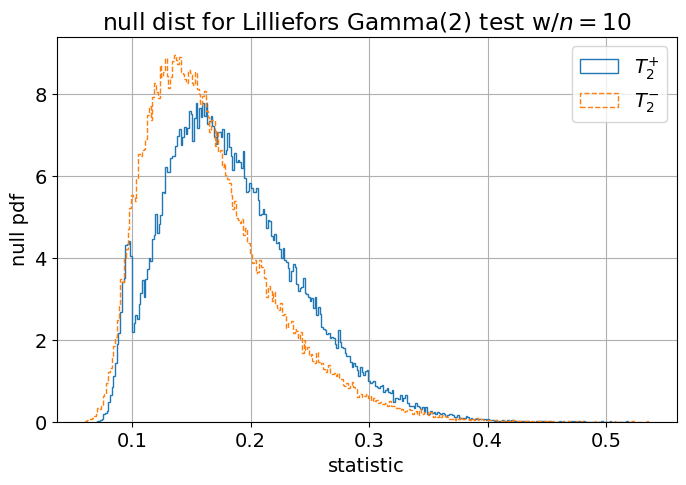

In [70]:
plt.hist(Tphat_I,bins='sqrt',density=True,histtype='step',label=r'$T_2^{+}$');
plt.hist(Tmhat_I,bins='sqrt',density=True,histtype='step',label=r'$T_2^{-}$',ls='dashed');
plt.xlabel('statistic');
plt.ylabel('null pdf');
plt.title(r'null dist for Lilliefors Gamma(2) test w/$n=%d$' % n);
plt.grid();
plt.legend();

<font color="brown">Our prescription is to take the larger of $T_2^{+}$ and $T_2^{-}$ to get $T_2$, so we do that for each sample in the Monte Carlo:</font>

In [71]:
That_I = np.maximum(Tphat_I,Tmhat_I)
That_I.shape

(100000,)

<font color="brown">Finally, the $p$-value is the fraction of Monte Carlo samples with $T_2\ge 0.243$:</font>

In [72]:
np.mean(That_I >= That)

0.23989

$$\hbox{$p$-value} = \boxed{\color{brown}{0.240}}$$

<font color="brown">We see that the data are consistent with the two-component Poisson model if we don't specify the rate a priori.</font>